# Comparative Analysis of Machine Learning Models for Data Science Salary Prediction



In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:/Users/hp/Downloads/archive (4)/jobs_in_data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [11]:
# Displaying the first few rows of the dataframe
print(df.head())

   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid     

In [12]:
# Checking for missing values
print(df.isnull().sum())

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [8]:
# Encoding categorical features using LabelEncoder
categorical_cols = ['job_title', 'job_category', 'salary_currency', 'employee_residence', 
                    'experience_level', 'employment_type', 'work_setting', 
                    'company_location', 'company_size']
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Selecting features (X) and target (y)
X = df_encoded.drop(columns=['salary_in_usd'])
y = df_encoded['salary_in_usd']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Algorithms

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initializing the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Training and evaluating each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Training the model
    y_pred = model.predict(X_test)  # Making predictions
    mse = mean_squared_error(y_test, y_pred)  # Calculating Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # Calculating R^2 score
    results[name] = {'MSE': mse, 'R2': r2}

# Displaying the results
results_df = pd.DataFrame(results).T
print(results_df)

                            MSE        R2
Linear Regression  9.748175e+07  0.976494
Decision Tree      1.340784e+08  0.967670
Random Forest      8.722870e+07  0.978967


In [23]:
random_forest_mse = results_df.loc['Random Forest', 'MSE']
random_forest_r2 = results_df.loc['Random Forest', 'R2']
linear_regression_mse = results_df.loc['Linear Regression', 'MSE']
linear_regression_r2 = results_df.loc['Linear Regression', 'R2']
decision_tree_mse = results_df.loc['Decision Tree', 'MSE']
decision_tree_r2 = results_df.loc['Decision Tree', 'R2']

# Interpretation

In [24]:
print("\nInterpretation:")
print("- Random Forest achieved the lowest Mean Squared Error (MSE) and the highest R-squared (R²) score among the three models, indicating its superior performance.")
print("- Linear Regression also performed well, demonstrating a strong linear relationship between the features and salary.")
print("- Decision Tree, while still decent, struggled with the complexity of the data and didn't perform as well as the other models.")


Interpretation:
- Random Forest achieved the lowest Mean Squared Error (MSE) and the highest R-squared (R²) score among the three models, indicating its superior performance.
- Linear Regression also performed well, demonstrating a strong linear relationship between the features and salary.
- Decision Tree, while still decent, struggled with the complexity of the data and didn't perform as well as the other models.


# Visualizing the Results

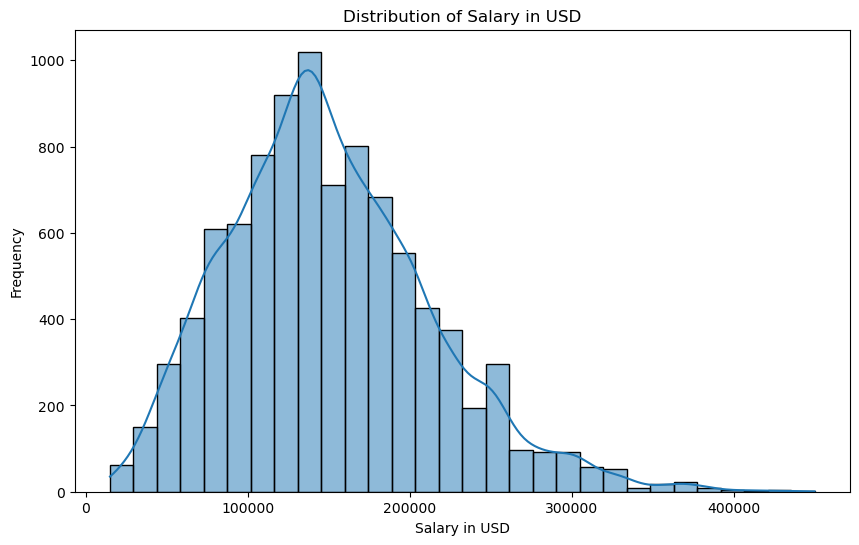

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of the target variable (salary in USD)
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

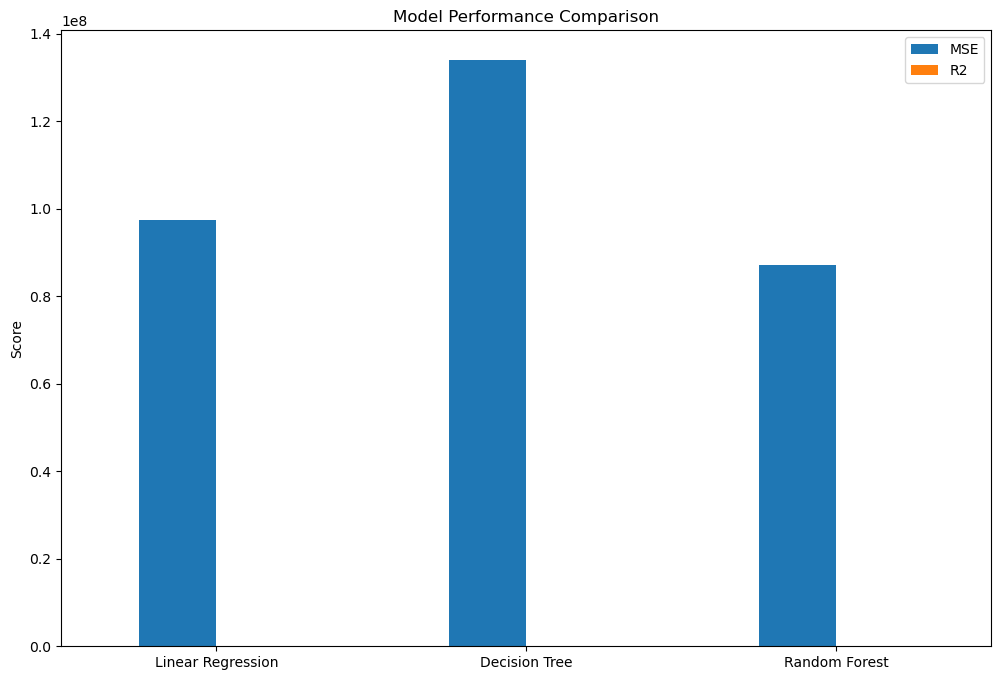

In [19]:
# Visualizing the performance of the models
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

# CONCLUSION

In [22]:
print("Based on our analysis, the Random Forest model is the most accurate for predicting salaries, closely followed by Linear Regression. Decision Tree, while not performing poorly, didn't quite measure up to the other two models.")
print(f"\nRandom Forest achieved an MSE of {random_forest_mse:.2e} and an R² score of {random_forest_r2:.5f}.")
print(f"Linear Regression achieved an MSE of {linear_regression_mse:.2e} and an R² score of {linear_regression_r2:.5f}.")
print(f"Decision Tree achieved an MSE of {decision_tree_mse:.2e} and an R² score of {decision_tree_r2:.5f}.")

Based on our analysis, the Random Forest model is the most accurate for predicting salaries, closely followed by Linear Regression. Decision Tree, while not performing poorly, didn't quite measure up to the other two models.

Random Forest achieved an MSE of 8.72e+07 and an R² score of 0.97897.
Linear Regression achieved an MSE of 9.75e+07 and an R² score of 0.97649.
Decision Tree achieved an MSE of 1.34e+08 and an R² score of 0.96767.
